# **Retail Price Optimization Using Machine Learning**

## **. Introduction**

The goal of this project is to optimize retail pricing by predicting total product prices based on features such as product quantity, unit price, competitor prices, and shipping costs. Accurate price prediction is crucial for adjusting pricing strategies to remain competitive and maximize revenue.






- **Business Problem**: The goal of this project is to predict the total product prices in retail setting using ML. this will help the company optimize its pricing strategy to maximize revenue and remain competitive in the market.

- **Importance**: Accurate price prediction is important for adjusting prices in response to market conditions , demands and competition , leading to a better decision-making and profitability.


- **Approach**: We explore different ML models , including Linear Regression , Random Forest and Gradient Boosting , to determine the most accurate model for predicting total prices . The best model is selected based on error metrics such as Mean Absolute Error (MAE) and Mean Squared Error (MSE).


In [ ]:
# setting up kaggle
# uploading the dataset

from google.colab import files
files.upload()

Saving kaggle (2).json to kaggle (2) (1).json


{'kaggle (2) (1).json': b'{"username":"abdullahalsudani","key":"9217e7ce48f5bb25d20878c02d1c39a9"}'}

In [ ]:
# install kaggle package
!pip install kaggle

# make a directory and move JSON file to it

!mkdir -p~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

# download the dataset

!kaggle datasets download -d suddharshan/retail-price-optimization

# unzip the downloaded file

!unzip retail-price-optimization.zip

mkdir: invalid option -- '~'
Try 'mkdir --help' for more information.
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/suddharshan/retail-price-optimization
License(s): CC0-1.0
retail-price-optimization.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  retail-price-optimization.zip
replace retail_price.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# loading the dataset

import pandas as pd

data = pd.read_csv('retail_price.csv')

# display first rows

print(data.head())

  product_id product_category_name  month_year  qty  total_price  \
0       bed1        bed_bath_table  01-05-2017    1        45.95   
1       bed1        bed_bath_table  01-06-2017    3       137.85   
2       bed1        bed_bath_table  01-07-2017    6       275.70   
3       bed1        bed_bath_table  01-08-2017    4       183.80   
4       bed1        bed_bath_table  01-09-2017    2        91.90   

   freight_price  unit_price  product_name_lenght  product_description_lenght  \
0      15.100000       45.95                   39                         161   
1      12.933333       45.95                   39                         161   
2      14.840000       45.95                   39                         161   
3      14.287500       45.95                   39                         161   
4      15.100000       45.95                   39                         161   

   product_photos_qty  ...  comp_1  ps1        fp1      comp_2  ps2  \
0                   2  ...    89.

# Data Exploration


**Dataset Overview:**

**-** Inspecting the Dataset :

 * Check the columns and data types to understand the core structure of this dataset:

In [ ]:
# Basic Information About the Dataset

data.info()


print("\n\n")


# Display Column Names

print(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

**2 -** Statistical Summaries:


*   Have a quick statistical view of the numerical features to see their range , anomalies and distribution:


In [ ]:
print(data.describe())

              qty   total_price  freight_price  unit_price  \
count  676.000000    676.000000     676.000000  676.000000   
mean    14.495562   1422.708728      20.682270  106.496800   
std     15.443421   1700.123100      10.081817   76.182972   
min      1.000000     19.900000       0.000000   19.900000   
25%      4.000000    333.700000      14.761912   53.900000   
50%     10.000000    807.890000      17.518472   89.900000   
75%     18.000000   1887.322500      22.713558  129.990000   
max    122.000000  12095.000000      79.760000  364.000000   

       product_name_lenght  product_description_lenght  product_photos_qty  \
count           676.000000                  676.000000          676.000000   
mean             48.720414                  767.399408            1.994083   
std               9.420715                  655.205015            1.420473   
min              29.000000                  100.000000            1.000000   
25%              40.000000                  339.000

**3 -** Check for missing values:
 * Identify if any columns have missing data to handle during the pre-processing phase:

In [ ]:
print(data.isnull().sum())

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64


**4 -** Understand Target Variable:


*   Giving that the task is about price optimation we would want to optimize the
total price variable:

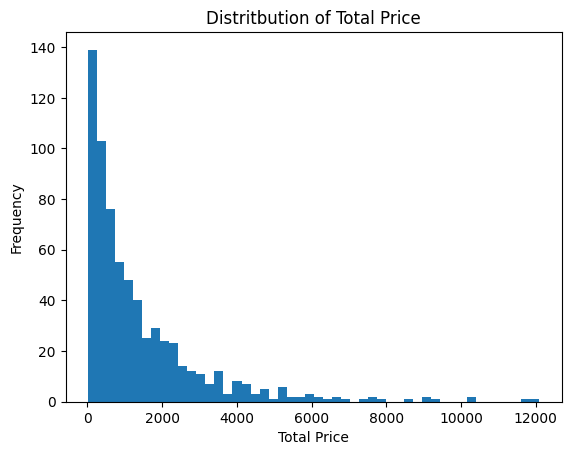

In [ ]:
import matplotlib.pyplot as plt

# Visulize distritbution of total price

plt.hist(data['total_price'], bins=50)
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.title('Distritbution of Total Price')
plt.show()

**5 -** Explore Relationships Between Variables:


*   Explore how different variables relate to each other:



In [ ]:
# Group by prodcut category and calculate the avg total price

category_price_avg = data.groupby('product_category_name')['total_price'].mean()
print(category_price_avg)


product_category_name
bed_bath_table           1558.762623
computers_accessories    2059.390580
consoles_games            263.668182
cool_stuff               1016.777193
furniture_decor          1185.940833
garden_tools             1022.390875
health_beauty            1633.917231
perfumery                 781.250769
watches_gifts            2015.360874
Name: total_price, dtype: float64




*   Total price accross months and years to identify seasonality and trends in sales:



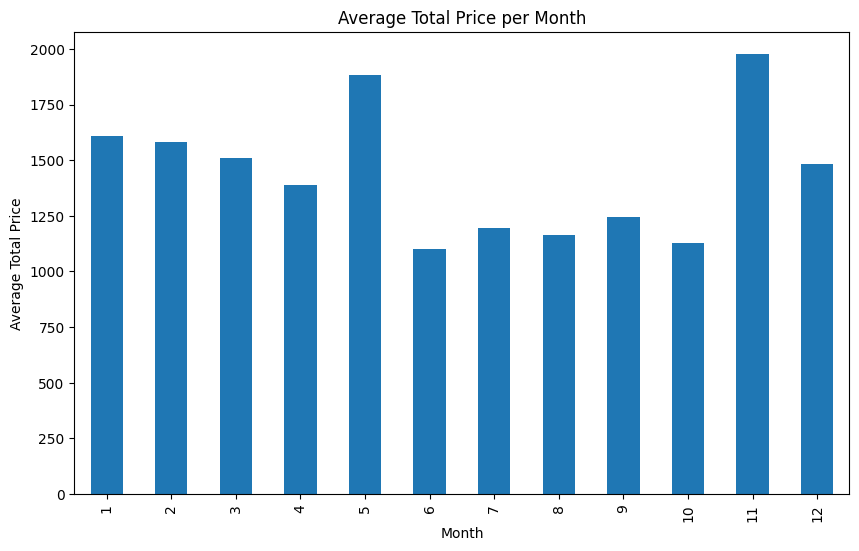

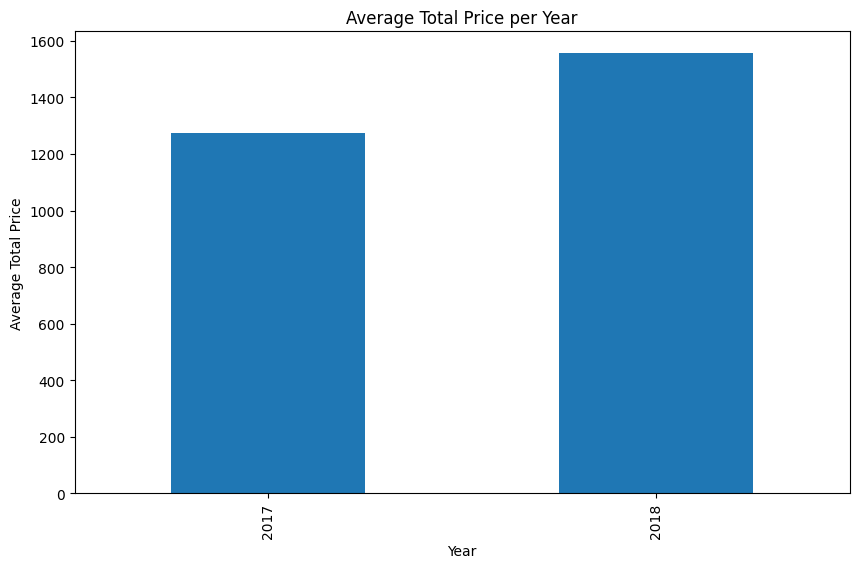

In [ ]:
# Avg total price per month

plt.figure(figsize=(10,6))
data.groupby('month')['total_price'].mean().plot(kind='bar')
plt.title('Average Total Price per Month')
plt.xlabel('Month')
plt.ylabel('Average Total Price')
plt.show


print("\n\n")
# Avg total price per year

plt.figure(figsize=(10,6))
data.groupby('year')['total_price'].mean().plot(kind='bar')
plt.title('Average Total Price per Year')
plt.xlabel('Year')
plt.ylabel('Average Total Price')
plt.show()



*   Total price on weekends , weekdays and holidays can provide insights into customer purchasing behavior.



weekend
8     1517.293932
9     1355.476207
10    1281.368152
Name: total_price, dtype: float64
holiday
0    1200.927143
1    1304.547280
2    1399.534634
3    2280.586500
4    1977.494773
Name: total_price, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

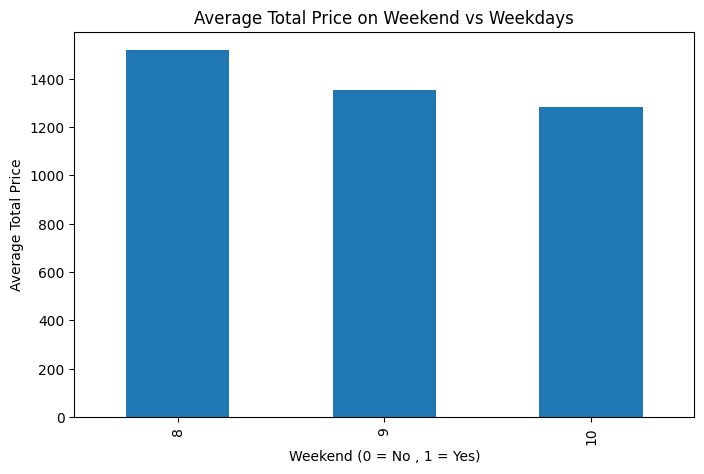

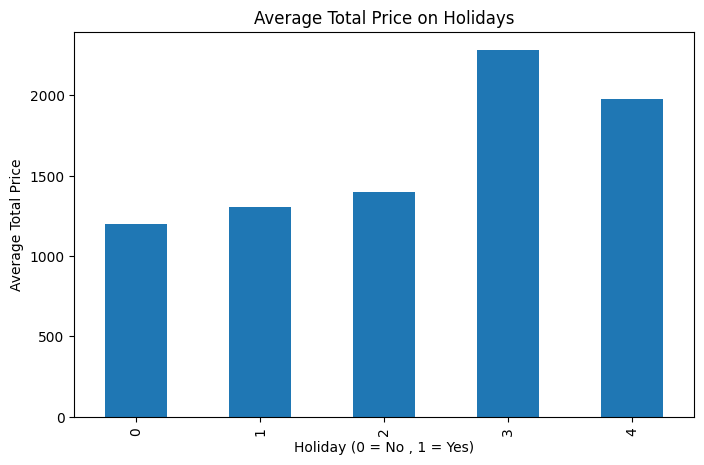

In [ ]:
weekend_avg = data.groupby('weekend')['total_price'].mean()
print(weekend_avg)

# visualize differences

plt.figure(figsize=(8,5))
weekend_avg.plot(kind='bar')
plt.title('Average Total Price on Weekend vs Weekdays')
plt.xlabel('Weekend (0 = No , 1 = Yes)')
plt.ylabel('Average Total Price')
plt.show

# Avg total price on holidays

holiday_avg = data.groupby('holiday')['total_price'].mean()
print(holiday_avg)

# Visualize holiday effect

plt.figure(figsize=(8,5))
holiday_avg.plot(kind='bar')
plt.title('Average Total Price on Holidays')
plt.xlabel('Holiday (0 = No , 1 = Yes)')
plt.ylabel('Average Total Price')
plt.show

# DATA PREPROCESSING


Data Cleaning:



*   Handle non-numeric values : Ensure that columns are correctly formated to numeric values only.
*   Outlier treatment : Cap outliers remove or transform them.
*   Duplicate Records : Remove duplicate records to avoid redundancy.


**Data Quality :**

The dataset has no missing values and all necessary columns are in the appropriate format for modelling.

In [ ]:
# handle non-numeric values


### NO COLUMN HAS NUMERIC VALUES , CODE BELOW IS USED IN CASE THERE WAS ONE , THAT'S WHY I COMMENTED IT OUT

### data['SOME_numeric_column'] = pd.to_numeric(data[some_numeric_column], errors='coerce')


# outlier treatment

Q1 = data['unit_price'].quantile(0.25)
Q3 = data['unit_price'].quantile(0.75)
IQR= Q3 - Q1

# define the bounds for detecting outliers

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Filter the outliers using .loc[]
data = data.loc[(data['unit_price'] >= lower_bound) & (data['unit_price'] <= upper_bound)]


# Remove duplicate rows (no need to change this part)
data.drop_duplicates(inplace=True)

<ipython-input-36-27ec8a6070d8>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


In [ ]:
#checking if THERE ARE numeric columns

print(data.dtypes)

product_id                     object
product_category_name          object
month_year                     object
qty                             int64
total_price                   float64
freight_price                 float64
unit_price                    float64
product_name_lenght             int64
product_description_lenght      int64
product_photos_qty              int64
product_weight_g                int64
product_score                 float64
customers                       int64
weekday                         int64
weekend                         int64
holiday                         int64
month                           int64
year                            int64
s                             float64
volume                          int64
comp_1                        float64
ps1                           float64
fp1                           float64
comp_2                        float64
ps2                           float64
fp2                           float64
comp_3      

In [ ]:
# Use .loc[] to filter and modify the original DataFrame without warnings
Q1 = data['unit_price'].quantile(0.25)
Q3 = data['unit_price'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the outliers using .loc[]
data = data.loc[(data['unit_price'] >= lower_bound) & (data['unit_price'] <= upper_bound)]

# Remove duplicate rows (no need to change this part)
data.drop_duplicates(inplace=True)

# **Encoding Categorial Variables**

We will use one-hot encodng for the 'product category name' columns to convert it into binary , this is important since MLM (typically) cannot work with categorial data in its original form.

In [ ]:
# one-hot encode 'product_category_name'

data = pd.get_dummies(data, columns = ['product_category_name'], drop_first = True)

# check data structure after encoding

print(data.head())

  product_id  month_year  qty  total_price  freight_price  unit_price  \
0       bed1  01-05-2017    1        45.95      15.100000       45.95   
1       bed1  01-06-2017    3       137.85      12.933333       45.95   
2       bed1  01-07-2017    6       275.70      14.840000       45.95   
3       bed1  01-08-2017    4       183.80      14.287500       45.95   
4       bed1  01-09-2017    2        91.90      15.100000       45.95   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                   39                         161                   2   
1                   39                         161                   2   
2                   39                         161                   2   
3                   39                         161                   2   
4                   39                         161                   2   

   product_weight_g  ...        fp3  lag_price  \
0               350  ...  15.100000      45.90   
1               

In [ ]:
# convert boolean columns to integers

encoded_columns = [col for col in data.columns if col.startswith('product_category_name')]
data[encoded_columns] = data[encoded_columns].astype(int)

# check first rows
print(data[encoded_columns].head())


   product_category_name_computers_accessories  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   product_category_name_consoles_games  product_category_name_cool_stuff  \
0                                     0                                 0   
1                                     0                                 0   
2                                     0                                 0   
3                                     0                                 0   
4                                     0                                 0   

   product_category_name_furniture_decor  product_category_name_garden_tools  \
0                                      0                                   0   
1                                      0                                   0

# **Scaling Numerical Features**

Now , we will scale all the numerical columns to ensure all features are on the same scale for training MLM.

In [ ]:
from sklearn.preprocessing import StandardScaler

# list of numerical columns to scale

numerical_features = ['qty', 'freight_price', 'unit_price', 'product_name_lenght',
                      'product_description_lenght', 'product_photos_qty',
                      'product_weight_g', 'product_score', 'customers', 'weekday',
                      'weekend', 'holiday', 'month', 'year', 's', 'volume',
                      'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2', 'comp_3',
                      'ps3', 'fp3', 'lag_price']

# intialize scaler

scaler = StandardScaler()

data[numerical_features] = scaler.fit_transform(data[numerical_features])

# check first few rows

print(data[numerical_features].head())

        qty  freight_price  unit_price  product_name_lenght  \
0 -0.879265      -0.537408   -0.960602            -1.008517   
1 -0.753453      -0.746686   -0.960602            -1.008517   
2 -0.564734      -0.562521   -0.960602            -1.008517   
3 -0.690546      -0.615887   -0.960602            -1.008517   
4 -0.816359      -0.537408   -0.960602            -1.008517   

   product_description_lenght  product_photos_qty  product_weight_g  \
0                   -0.937976            0.063966         -0.683337   
1                   -0.937976            0.063966         -0.683337   
2                   -0.937976            0.063966         -0.683337   
3                   -0.937976            0.063966         -0.683337   
4                   -0.937976            0.063966         -0.683337   

   product_score  customers   weekday  ...    comp_1       ps1       fp1  \
0      -0.360985  -0.369905  1.250394  ...  0.298547 -2.130712 -0.411802   
1      -0.360985  -0.306377  0.234654  ...

## **. Data Exploration and Preprocessing**


- **Dataset Overview**: The dataset contains key features related to sales , including product prices , quantities sold , shipping costs and competitor prices.
It also includes features like month,year and whether the sale occured on a weekend or a weekday.

- **Handling Outliers**: Outliers in the `unit_price` were hanled using the interquartile range (IQR) method to reduce their impact on the model.
- **Encoding Categorical Variables**: The categorical variable `product_category_name` was one-hot encoded to ensure that the model can process it correctly.
- **Scaling Numerical Features**: All numerical features (e.g., `qty`, `unit_price`, `freight_price`) were scaled using StandardScaler to standardize the data for model training.


# **Splitting the Data**

we'll split the dataset into training and testing sets. This will allow us to train the model on the training set and evaluate its performance on the testing set.

In [ ]:
from sklearn.model_selection import train_test_split

# define features X and target Y

X = data.drop('total_price' , axis = 1) # all columns except 'total_price'
y = data['total_price'] # terget variable

# split the data where 80% is for training and 20% for testing

X_train , X_test , y_train , y_test = train_test_split(X , y, test_size = 0.2 , random_state =42)

# check the shape of the dataset to ensure splitting was done successfuly

print("Training set : ", X_train.shape , y_train.shape)
print("Testing set : ", X_test.shape, y_test.shape)


Training set :  (495, 36) (495,)
Testing set :  (124, 36) (124,)


# **Model Training**

- We will train a **Linear Regression Model** , **Gradient Boosting Model** and a **Random Forest Regressor** Model and evaluate their performance using mean absolute error and mean squared error :

1.   **Linear Regression**: A simple model that assumes a linear relationship between features.

2.   **Random Forest**: A model that builds multiple decision trees and averages their predictions.

3.   **Gradient Boosting**: A boosting algorithm that builds multiple decision trees sequentially , with each tree corrects the errors of the previous one.

### **Model Results:**
Each model was evaluated using **Mean Absolute Error (MAE)** and **Mean Squared Error (MSE)** to assess prediction accuracy.



In [ ]:
# Linear Regression Model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error

# initialize linear regression model

model = LinearRegression()

# train the model on the training data
# drop 'product_id' and 'month_year' columns from X_train before fitting

model.fit(X_train.drop(['product_id', 'month_year'], axis=1),y_train)

# Make predictions on the test set
# drop 'product_id' and 'month_year' columns from X_test before predicting

y_pred = model.predict(X_test.drop(['product_id', 'month_year'], axis=1))

# evaluate the model

mae = mean_absolute_error(y_test , y_pred)
mse = mean_squared_error(y_test , y_pred)
print(f'Mean Absolute Error (MAE) : {mae}')
print(f'Mean Squared Error (MSE) : {mse}')

Mean Absolute Error (MAE) : 414.9320875175971
Mean Squared Error (MSE) : 347039.1892113554


In [ ]:
# Random Forest Regressor Model

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
rf_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
print(f'Random Forest MAE: {rf_mae}')
print(f'Random Forest MSE: {rf_mse}')


Random Forest MAE: 154.05914919354854
Random Forest MSE: 343686.62750759174


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predict and evaluate
gb_pred = gb_model.predict(X_test)
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_mse = mean_squared_error(y_test, gb_pred)
print(f'Gradient Boosting MAE: {gb_mae}')
print(f'Gradient Boosting MSE: {gb_mse}')


Gradient Boosting MAE: 141.78532944506674
Gradient Boosting MSE: 246109.95358308384


# **Insights** :

**Gradient Boosting** appears to be the most effective model for predicting the total price in this case , compared to Linear Regression and Random Forest:


  - MAE: 141.79
  - MSE: 246,109.95

**Random Forest** has a high variance in prediction errors:


  - MAE: 154.06
  - MSE: 343,686.63

**Linear regression** simple model but not effective for this task:

- MAE: 414.93
- MSE: 347,039.19



**Conclusion**: Based on these metrics, the Gradient Boosting model performed the best, with the lowest MAE and MSE.


# **Feature Importance Analysis**

The Gradient Boosting model provided insights into the most important features driving price predictions. The key features identified were:

**-** qty (Quantity Sold): The most important feature , as the number of products sold directly influences the total price .

**-** unit_price (Unit Price): The price per unit is another significant driver of the total price.

**-** comp3 and comp2 (Competitor Prices): Competitor prices significantly affect the total price, indicating the need for competitive pricing strategies.

**-** freight_price (Shipping Cost): Shipping costs contribute notably to the total pric , underscoring the importance of optimizing logistics.

**-** weekend: Weekend sales also had an impact,suggesting potentioal demand fluctuations or the effect of promotions
.

- The following graph shows the top 10 most important features identified by the Gradient Boosting model:

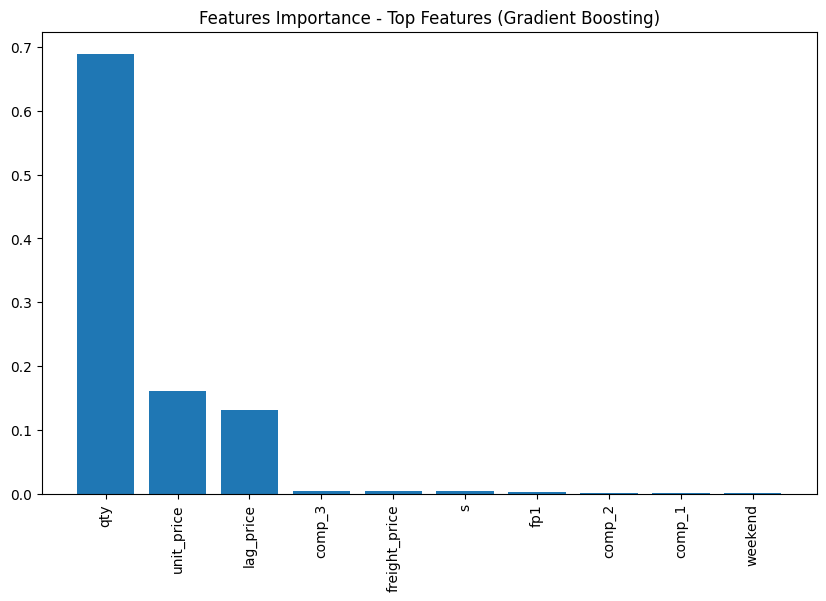

In [ ]:
# Get feature importance from the Gradient Boosting Model



# Visualize top features
best_gb_model = gb_model

feature_importance = best_gb_model.feature_importances_

import matplotlib.pyplot as plt
import numpy as np


indices = np.argsort(feature_importance)[::-1]
top_features = 10 # Display top 10
plt.figure(figsize=(10,6))
plt.title("Features Importance - Top Features (Gradient Boosting)")
plt.bar(range(top_features), feature_importance[indices][:top_features], align= "center" )
plt.xticks(range(top_features), X_train.columns[indices][:top_features], rotation=90)
plt.show()

# **Insights:**

The Gradient Boosting model provided insights into the most important features driving price predictions. The key features identified were:

**-** qty (Quantity Sold): The most important feature , as the number of products sold directly influences the total price .

**-** unit_price (Unit Price): The price per unit is another significant driver of the total price.

**-** comp3 and comp2 (Competitor Prices): Competitor prices significantly affect the total price, indicating the need for competitive pricing strategies.

**-** freight_price (Shipping Cost): Shipping costs contribute notably to the total pric , underscoring the importance of optimizing logistics.

**-** weekend: Weekend sales also had an impact,suggesting potentioal demand fluctuations or the effect of promotions
.

- The graph above shows the top 10 most important features identified by the Gradient Boosting mode.

#**Final Discussion and Recommendations.**
**Model Strengths and Limitation:**


**Strengths:**

- **The Gradient Boosting Model** captued non-linear relationships effectively , making it the most accurate model for this task.

- It provided insights into the most important factors driving price, which can be used for strategic decision-making.

**Limitations:**
- **The Gradient Boosting Model** is more expenise (computationally) and complex compared to simpler models like Linear Regression.

- The model might need to be retrained periodically as market conditions and competitor pricing strategies change.




# **Business Recommendations:**

Based on the feature importance analysis , the following startegies are recommended for optimizing retail pricing :     

**-** **Monitor Competitor Prices:**

Competitor prices (comp3,comp2) significantly impact total prices. The company should closely monitor competitors and adjust pricing dynamically to remain competitive.

**-** **Optimize Shipping Costs:**

Since shipping (freight_price) play a major role , optimizing logistics and reducing shipping costs can help improve profitabiliy.

**-** **Weekend Promotions:**

Given the influence of weekend sales , consider offering targeted promotions during weekends to boost sales and revenue.

**-** **Demand-Based Pricing:**

The quantity sold (qty) is a key driver of price. Consider implementing dynamic pricing strategies based on real-time demand to maximize revenue.

# **Conclusion:**

The **Gradient Boosting Model** was the most effective for predicting total prices in retail environment. By leveraging the insights gained from this model, the company can optimize its pricing strategies , stay competitive in the market and maximize revenue. Future work could include exploring additional features such as seasonal trends and customer segmentation to further enhance model accuracy.